In [50]:
# Librerias para aprendizaje profundo y machine learning
from tensorflow import keras, data
# Librerias para manipulacion de datos
import numpy as np
import matplotlib.pyplot as plt
# Librerias utilitarias
import os

In [51]:
#--------------------------------------------#
# SECCION DE VARIABLES CONSTANTES Y GLOBALES #
#--------------------------------------------#
# ruta de imagenes
path_grupo_imgs = "./assets/sub_imgs/" 
# Cantidad de imagenes
tam_lote = 32
# Dimensiones de las imagenes
dim_imgs = (212, 262)

In [52]:
# Funcion de extraccion de datos, de la carpeta contenedora
con_datos_train = keras.utils.image_dataset_from_directory(
    path_grupo_imgs,
    batch_size = 32,
    image_size = dim_imgs,
    validation_split = 0.15,
    subset="training",
    #label_mode = "categorical",
    seed=42
)

Found 1387 files belonging to 3 classes.
Using 1179 files for training.


In [53]:
con_datos_val = keras.utils.image_dataset_from_directory(
    path_grupo_imgs,
    batch_size = 32,
    image_size = dim_imgs,
    validation_split = 0.15,
    subset="validation",
    #label_mode = "categorical",
    seed=42,
)

Found 1387 files belonging to 3 classes.
Using 208 files for validation.


In [54]:
# extraccion de lista de labels
nombres_clase = con_datos_train.class_names
print(nombres_clase)

['dcl_imgs', 'demencia_imgs', 'normal_imgs']


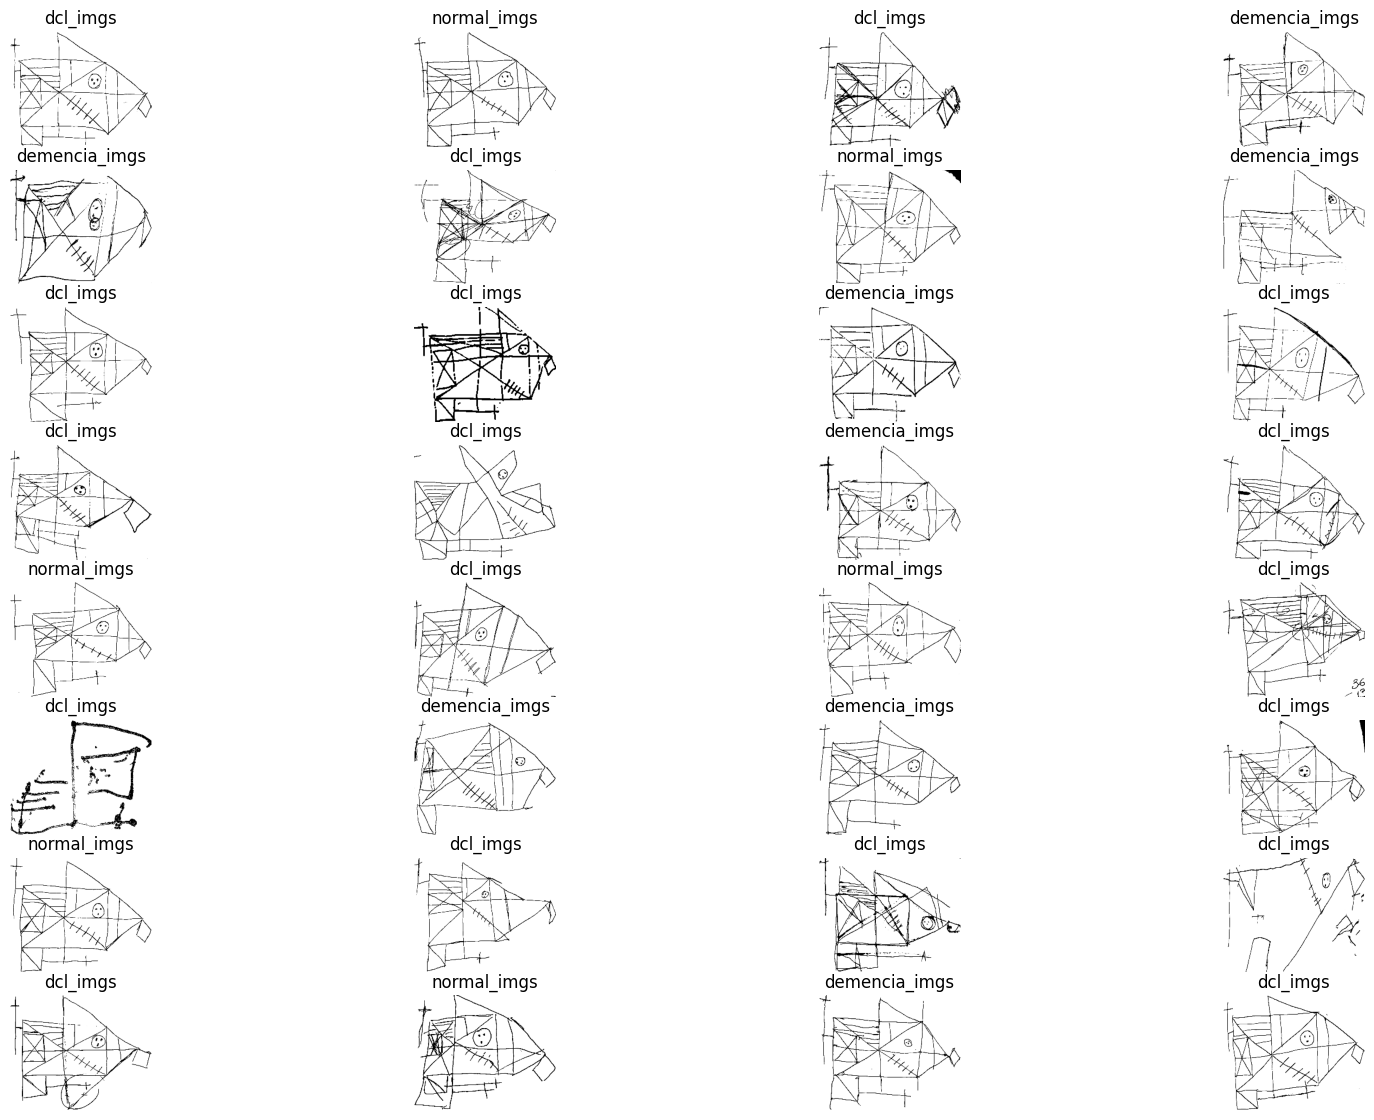

In [55]:
# Impresion de imagenes existentes en el dataset de entrenamiento
plt.figure(figsize=(20, 14))
for img, label in con_datos_train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(nombres_clase[label[i]])
        plt.axis("off")

In [56]:
AUTOTUNE = data.AUTOTUNE
# Funcion para organizar las imagenes en la primera epoca y evitar cuellos de botella
con_datos_train = con_datos_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# Crea un nodo para que se ejecute la validacion durante el mismo entrenamiento
con_datos_val = con_datos_val.cache().prefetch(buffer_size=AUTOTUNE)

In [57]:
## Se crea la capa de normalizacion
capa_normalizacion = keras.layers.Rescaling(1./255)
# Se realiza la normalizacion de los pixeles de 255 = 1 y 0 = 0
datos_normalizados = con_datos_train.map(lambda x, y: (capa_normalizacion(x), y))
# se crean los batch y labels
image_batch, labels_batch = next(iter(datos_normalizados))
## Extraccion de la primera imagen
primera_img = image_batch[0]
# Desues de este proceso los valores de cada pixel seran dados por [1, 0]
print(np.min(primera_img), np.max(primera_img))

0.0 1.0


In [58]:
# Prueba numero 1
num_classes = len(nombres_clase)
# Modo por rescaling
model_re = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(dim_imgs[0], dim_imgs[1], 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [59]:
model_re.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
epochs=20
history = model_re.fit(
  con_datos_train,
  validation_data=con_datos_val,
  epochs=epochs
)

Epoch 1/20
37/37 [==============================] - 5s 127ms/step - loss: 1.5002 - accuracy: 0.5148 - val_loss: 0.9597 - val_accuracy: 0.5529
Epoch 2/20
37/37 [==============================] - 4s 117ms/step - loss: 0.9311 - accuracy: 0.5776 - val_loss: 0.9389 - val_accuracy: 0.5865
Epoch 3/20
37/37 [==============================] - 4s 115ms/step - loss: 0.8455 - accuracy: 0.6260 - val_loss: 0.9271 - val_accuracy: 0.5769
Epoch 4/20
37/37 [==============================] - 4s 116ms/step - loss: 0.7217 - accuracy: 0.6845 - val_loss: 1.0281 - val_accuracy: 0.5337
Epoch 5/20
37/37 [==============================] - 4s 115ms/step - loss: 0.5545 - accuracy: 0.7659 - val_loss: 1.0587 - val_accuracy: 0.5240
Epoch 6/20
37/37 [==============================] - 4s 115ms/step - loss: 0.3577 - accuracy: 0.8804 - val_loss: 1.5156 - val_accuracy: 0.5048
Epoch 7/20
37/37 [==============================] - 4s 116ms/step - loss: 0.1870 - accuracy: 0.9389 - val_loss: 2.2599 - val_accuracy: 0.5096
Epoch 

In [61]:
# modelo de denso
modeloDenso = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(dim_imgs[0], dim_imgs[1], 3)),
  keras.layers.Flatten(),
  keras.layers.Dense(150, activation='relu'),
  keras.layers.Dense(150, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

In [62]:
modeloDenso.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
epochs=20
history = modeloDenso.fit(
  con_datos_train,
  validation_data=con_datos_val,
  epochs=epochs
)

Epoch 1/20


c:\Users\edavi\OneDrive\Escritorio\Py_completo\pyEnvCamilo\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


37/37 [==============================] - 5s 113ms/step - loss: 59.3201 - accuracy: 0.4063 - val_loss: 23.2842 - val_accuracy: 0.5529
Epoch 2/20
37/37 [==============================] - 4s 100ms/step - loss: 18.4812 - accuracy: 0.4487 - val_loss: 22.8279 - val_accuracy: 0.1971
Epoch 3/20
37/37 [==============================] - 5s 122ms/step - loss: 10.7240 - accuracy: 0.4139 - val_loss: 8.1877 - val_accuracy: 0.2500
Epoch 4/20
37/37 [==============================] - 5s 129ms/step - loss: 15.8611 - accuracy: 0.4148 - val_loss: 6.5658 - val_accuracy: 0.2067
Epoch 5/20
37/37 [==============================] - 5s 131ms/step - loss: 7.4077 - accuracy: 0.4097 - val_loss: 1.6635 - val_accuracy: 0.5529
Epoch 6/20
37/37 [==============================] - 6s 169ms/step - loss: 3.8335 - accuracy: 0.4436 - val_loss: 4.5269 - val_accuracy: 0.5529
Epoch 7/20
37/37 [==============================] - 5s 126ms/step - loss: 2.7084 - accuracy: 0.4682 - val_loss: 2.6867 - val_accuracy: 0.5529
Epoch 8/20


In [64]:
# Tercer modelo probado
modelo_3_cnn = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(dim_imgs[0], dim_imgs[1], 3)),
  keras.layers.Conv2D(32, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(48, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.4),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

In [65]:
# modelo compilado
modelo_3_cnn.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
epochs=20
history = modelo_3_cnn.fit(
  con_datos_train,
  validation_data=con_datos_val,
  epochs=epochs
)

Epoch 1/20
37/37 [==============================] - 11s 270ms/step - loss: 1.3090 - accuracy: 0.5233 - val_loss: 0.9952 - val_accuracy: 0.5529
Epoch 2/20
37/37 [==============================] - 10s 269ms/step - loss: 0.9938 - accuracy: 0.5615 - val_loss: 0.9938 - val_accuracy: 0.5529
Epoch 3/20
37/37 [==============================] - 9s 243ms/step - loss: 0.9928 - accuracy: 0.5615 - val_loss: 1.0079 - val_accuracy: 0.5529
Epoch 4/20
37/37 [==============================] - 10s 272ms/step - loss: 0.9894 - accuracy: 0.5615 - val_loss: 0.9871 - val_accuracy: 0.5529
Epoch 5/20
37/37 [==============================] - 20s 540ms/step - loss: 0.9798 - accuracy: 0.5615 - val_loss: 0.9862 - val_accuracy: 0.5529
Epoch 6/20
37/37 [==============================] - 17s 460ms/step - loss: 0.9689 - accuracy: 0.5589 - val_loss: 0.9878 - val_accuracy: 0.5529
Epoch 7/20
37/37 [==============================] - 9s 250ms/step - loss: 0.9206 - accuracy: 0.5793 - val_loss: 0.9681 - val_accuracy: 0.5625
E

In [67]:
# Cnn2 keras model
modeloCNN2 = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(dim_imgs[0], dim_imgs[1], 3)),
  keras.layers.Conv2D(32, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Conv2D(128, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(250, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

In [68]:
# modelo compilado
modeloCNN2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
epochs=20
history = modeloCNN2.fit(
  con_datos_train,
  validation_data=con_datos_val,
  epochs=epochs
)

Epoch 1/20


37/37 [==============================] - 16s 417ms/step - loss: 2.0408 - accuracy: 0.5267 - val_loss: 0.9999 - val_accuracy: 0.5529
Epoch 2/20
37/37 [==============================] - 15s 395ms/step - loss: 0.9906 - accuracy: 0.5615 - val_loss: 1.0029 - val_accuracy: 0.5529
Epoch 3/20
37/37 [==============================] - 14s 384ms/step - loss: 0.9945 - accuracy: 0.5615 - val_loss: 0.9961 - val_accuracy: 0.5529
Epoch 4/20
37/37 [==============================] - 16s 421ms/step - loss: 0.9896 - accuracy: 0.5615 - val_loss: 0.9817 - val_accuracy: 0.5529
Epoch 5/20
37/37 [==============================] - 14s 369ms/step - loss: 0.9672 - accuracy: 0.5606 - val_loss: 0.9567 - val_accuracy: 0.5529
Epoch 6/20
37/37 [==============================] - 14s 367ms/step - loss: 0.9274 - accuracy: 0.5708 - val_loss: 0.9409 - val_accuracy: 0.5769
Epoch 7/20
37/37 [==============================] - 14s 367ms/step - loss: 0.8949 - accuracy: 0.5946 - val_loss: 0.9450 - val_accuracy: 0.5577
Epoch 8/20

In [21]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modelo_CNN.fit(con_datos_train,
            epochs=15,
            validation_data=con_datos_val,
            callbacks=[tensorboardDenso]
    )

Epoch 1/15


37/37 [==============================] - 10s 242ms/step - loss: 96.5370 - accuracy: 0.4190 - val_loss: 1.0809 - val_accuracy: 0.5288
Epoch 2/15
37/37 [==============================] - 9s 239ms/step - loss: 1.0303 - accuracy: 0.5310 - val_loss: 1.0302 - val_accuracy: 0.5144
Epoch 3/15
37/37 [==============================] - 13s 362ms/step - loss: 0.9749 - accuracy: 0.5589 - val_loss: 1.0172 - val_accuracy: 0.5529
Epoch 4/15
37/37 [==============================] - 16s 443ms/step - loss: 0.9248 - accuracy: 0.5980 - val_loss: 1.0274 - val_accuracy: 0.5288
Epoch 5/15
37/37 [==============================] - 16s 433ms/step - loss: 0.8547 - accuracy: 0.6031 - val_loss: 1.0402 - val_accuracy: 0.5144
Epoch 6/15
37/37 [==============================] - 16s 429ms/step - loss: 0.7921 - accuracy: 0.6573 - val_loss: 1.0459 - val_accuracy: 0.4952
Epoch 7/15
37/37 [==============================] - 16s 427ms/step - loss: 0.6875 - accuracy: 0.6980 - val_loss: 1.1874 - val_accuracy: 0.53